Spanish Translation A/B Test Goal

A/B tests play a huge role in website optimization. Analyzing A/B tests data is a very important data scientist responsibility. Especially, data scientists have to make sure that results are reliable, trustworthy, and conclusions can be drawn.

Furthermore, companies often run tens, if not hundreds, of A/B tests at the same time. Manually analyzing all of them would require lot of time and people. Therefore, it is common practice to look at the typical A/B test analysis steps and try to automate as much as possible. This frees up time for the data scientists to work on more high level topics.

In this challenge, you will have to analyze results from an A/B test. Also, you will be asked to design an algorithm to automate some steps.

Challenge Description
Company XYZ is a worldwide e-commerce site with localized versions of the site.
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.
Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

You are asked to:
1.Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better

2.Explain why that might be happening. Are the localized translations really worse?

3.If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from scipy.stats import ttest_ind

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

import  warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [3]:
test = pd.read_csv('/Users/Jackie/Desktop/py4e/DS_takehome_challenges/Spanish Translation A/Translation_Test/test_table.csv')

In [4]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [5]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [125]:
user = pd.read_csv('/Users/Jackie/Desktop/py4e/DS_takehome_challenges/Spanish Translation A/Translation_Test/user_table.csv'
                  ,dtype={'age': int})

In [126]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [128]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [129]:
# Merge two tables
data = pd.merge(left=test, right=user, how='left', on='user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


# A/B Test

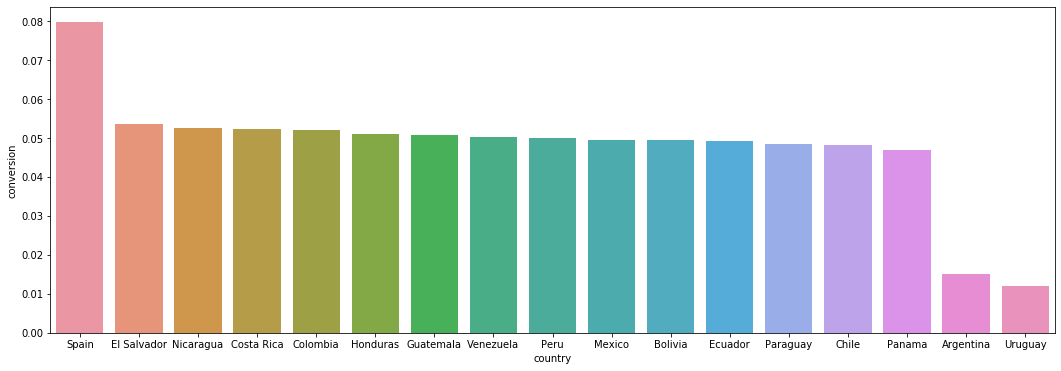

In [21]:
# First question is: check test results. But even before that, let’s make sure it is true Spain converts much better than the rest of LatAm countries.
#First check that Spain converts much better than the rest of LatAm countries
groupby_country = data[data['test'] == 0][['conversion', 'country']].groupby('country').mean()
groupby_country = groupby_country.reset_index()
groupby_country = groupby_country.sort_values('conversion', ascending=False)

# Visualization
plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', data=groupby_country)
plt.show()

In [13]:
groupby_country

,country,conversion
14,Spain,0.079719
6,El Salvador,0.053554
10,Nicaragua,0.052647
4,Costa Rica,0.052256
3,Colombia,0.052089
8,Honduras,0.050906
7,Guatemala,0.050643
16,Venezuela,0.050344
13,Peru,0.049914
9,Mexico,0.049495


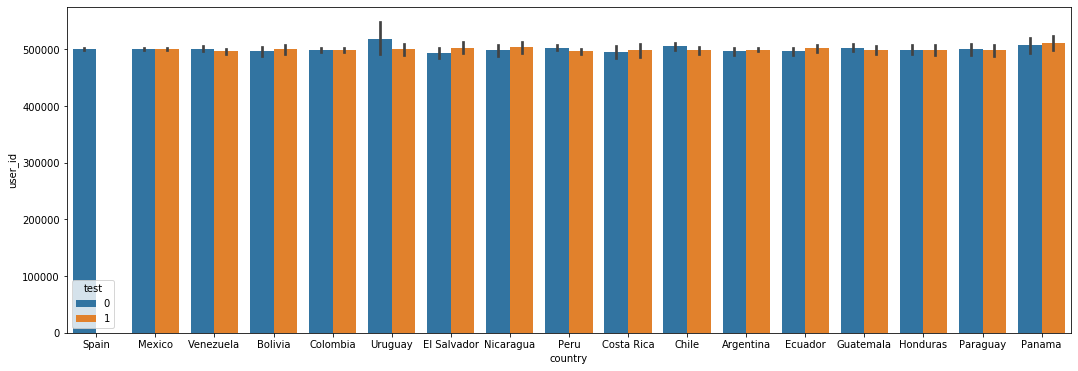

In [23]:
# Visualization, see if split the test 50/50
plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='user_id',hue='test', data=data)
plt.show()

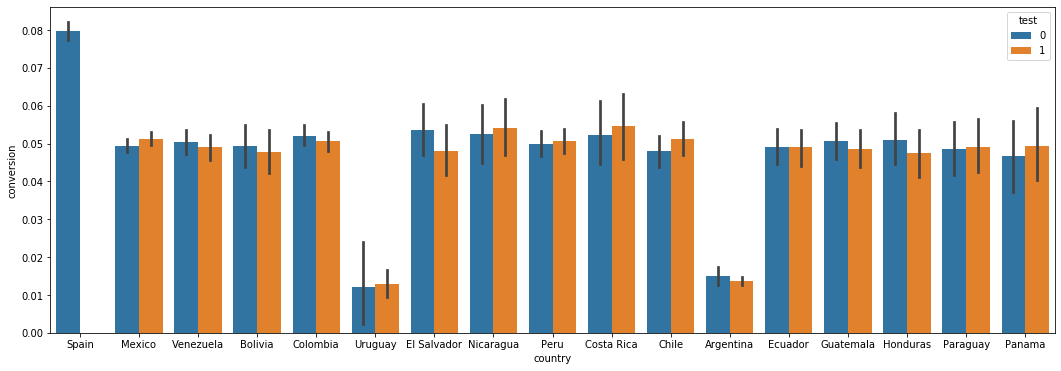

In [24]:
# Visualization, see conversion by contry
plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion',hue='test', data=data)
plt.show()

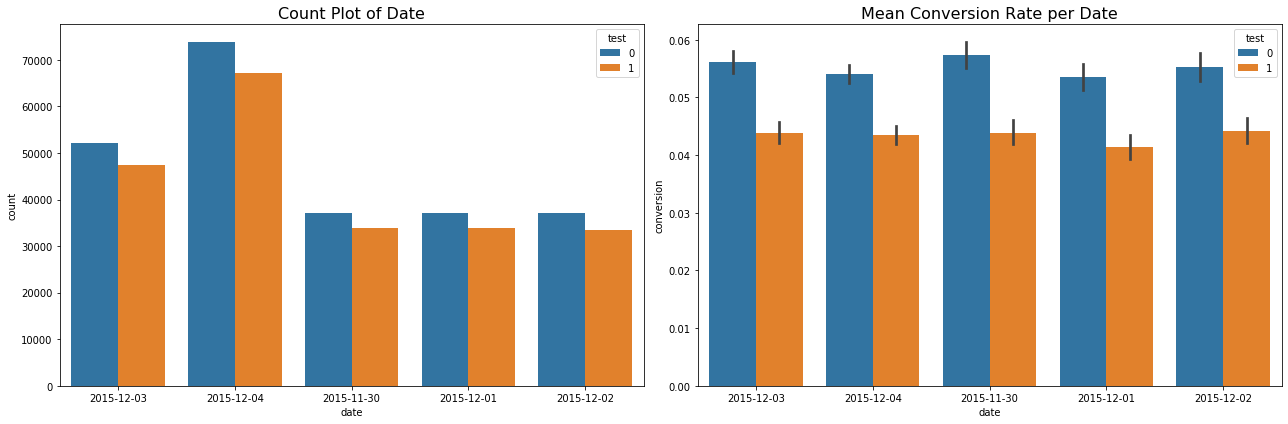

In [89]:
# Visualization of different dates
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='date', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Date', fontsize=16)

sns.barplot(x='date', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Date', fontsize=16)
plt.tight_layout()
plt.show()

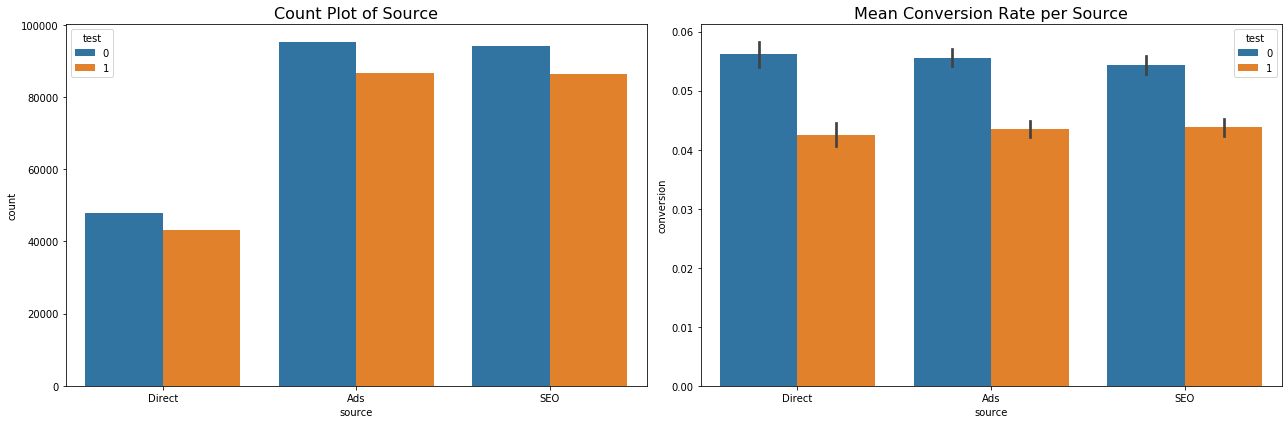

In [90]:
# Visualization of different source
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Source', fontsize=16)

sns.barplot(x='source', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

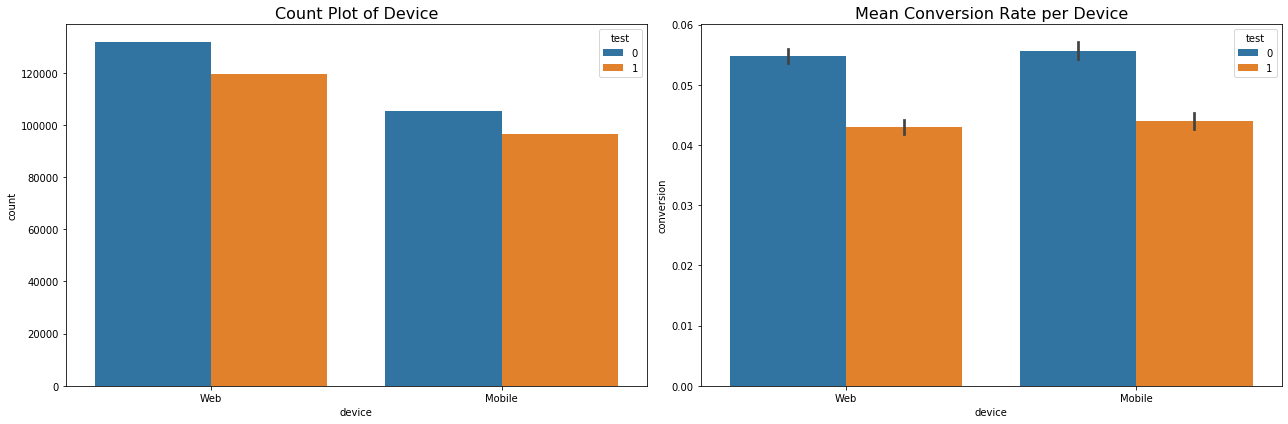

In [91]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='device', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Device', fontsize=16)

sns.barplot(x='device', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Device', fontsize=16)
plt.tight_layout()
plt.show()

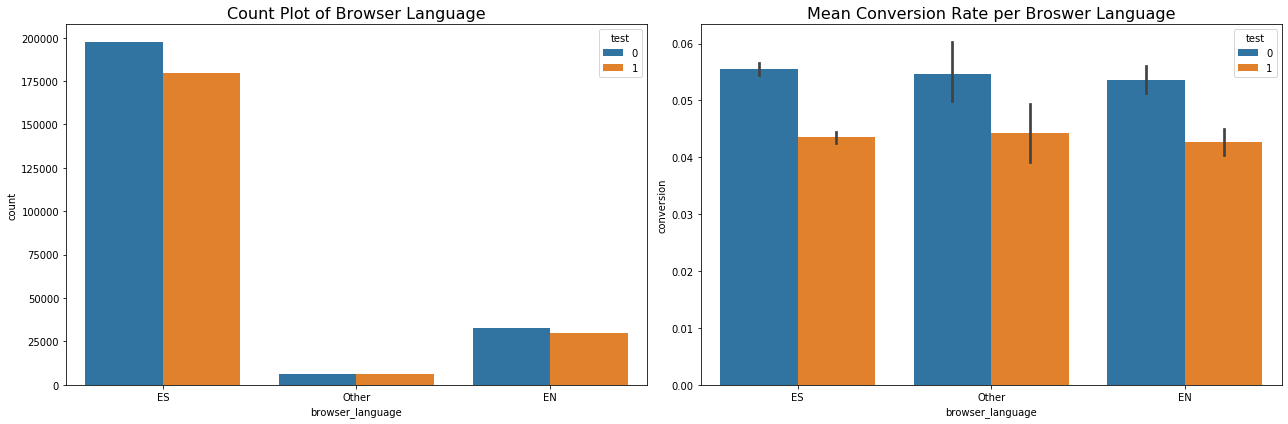

In [92]:
# Visualization of different language
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser_language', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Browser Language', fontsize=16)

sns.barplot(x='browser_language', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Broswer Language', fontsize=16)
plt.tight_layout()
plt.show()

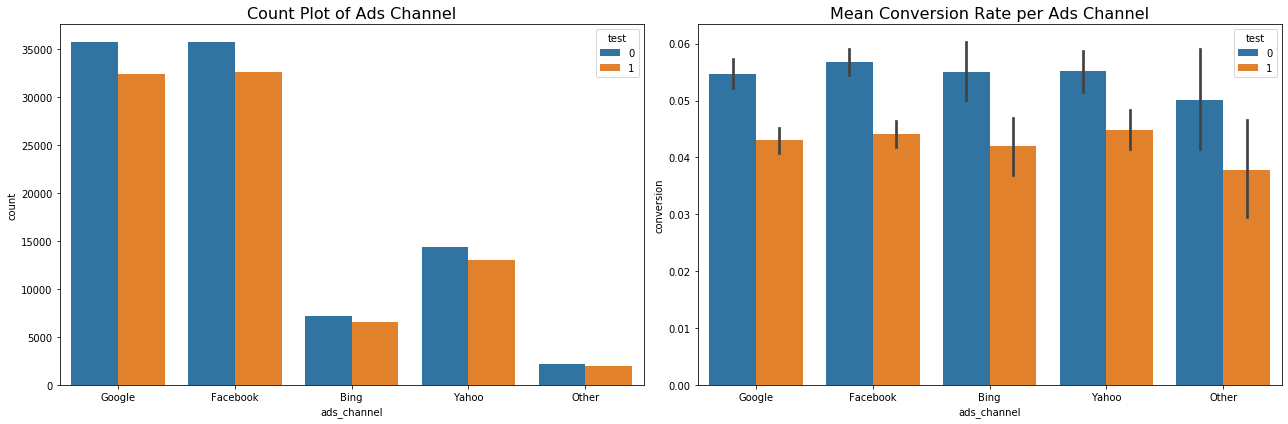

In [110]:
# Visualization of different ads channel
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
sns.countplot(x='ads_channel',hue='test', data=data, ax=ax[0])
sns.barplot(x='ads_channel',y='conversion',hue='test',data=data,ax=ax[1])

ax[0].set_title('Count Plot of Ads Channel', fontsize=16)
ax[1].set_title('Mean Conversion Rate per Ads Channel', fontsize=16)

plt.tight_layout()
plt.show()

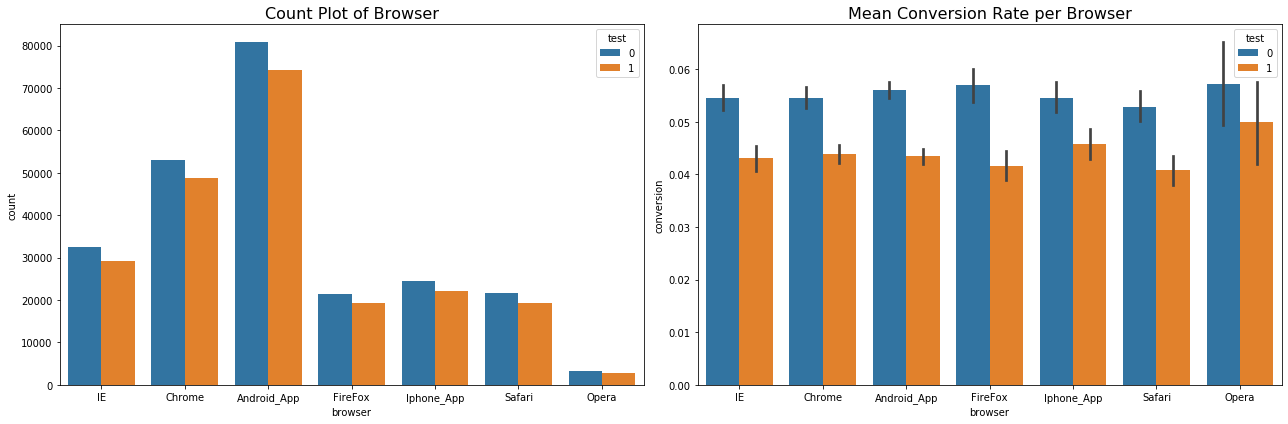

In [111]:
# Visualization of different browsers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Browser', fontsize=16)

sns.barplot(x='browser', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Browser', fontsize=16)
plt.tight_layout()
plt.show()

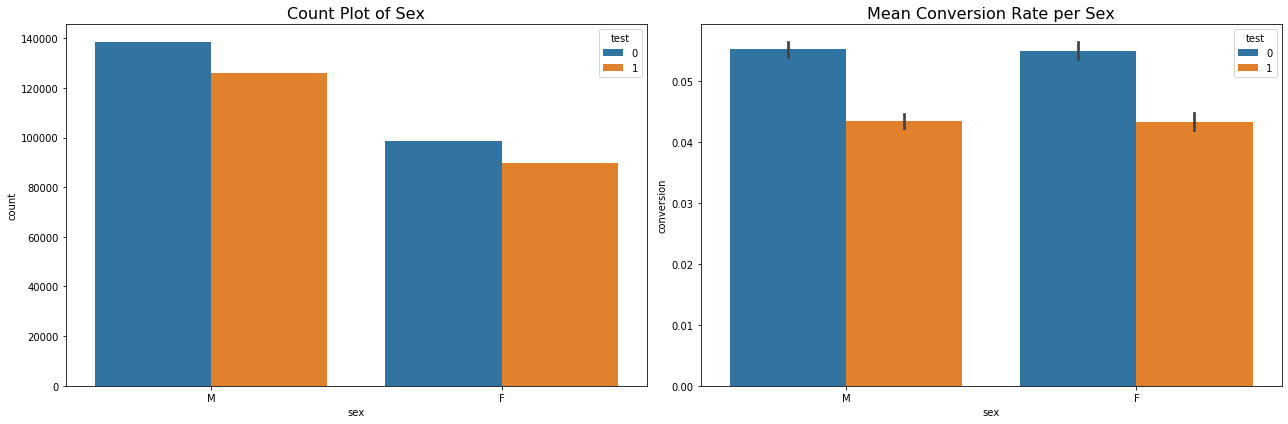

In [112]:
# Visualization of different sexs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='sex', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Sex', fontsize=16)

sns.barplot(x='sex', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Sex', fontsize=16)
plt.tight_layout()
plt.show()

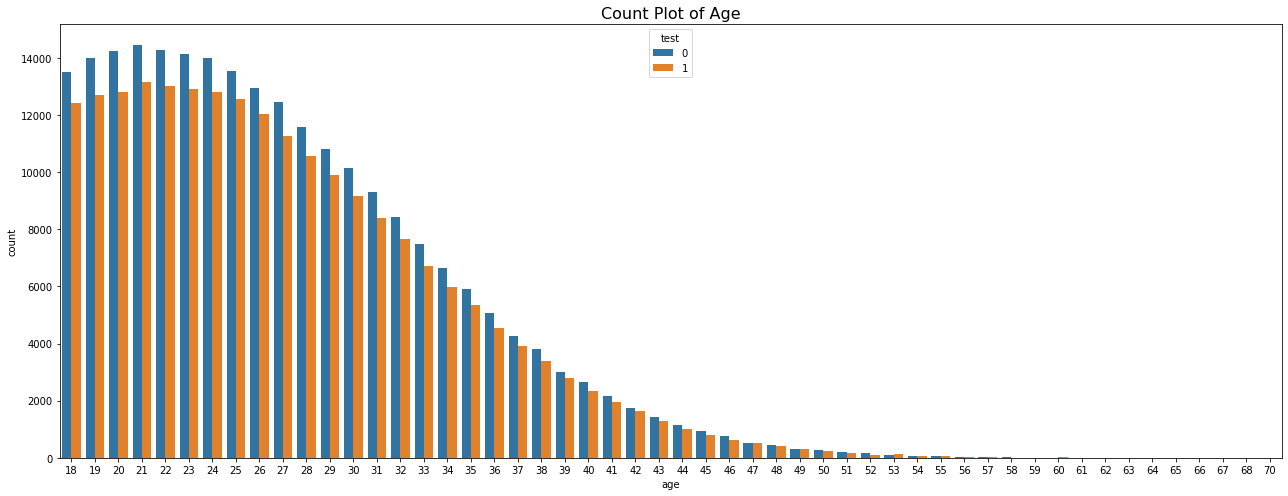

In [157]:
# Visualization of different ages
plt.subplots(figsize=(18, 7))
sns.countplot(x='age', hue='test', data=data.dropna(axis = 0,subset = ['age']).astype({'age': 'int64'}))
plt.title('Count Plot of Age', fontsize=16)
plt.tight_layout()
plt.show()

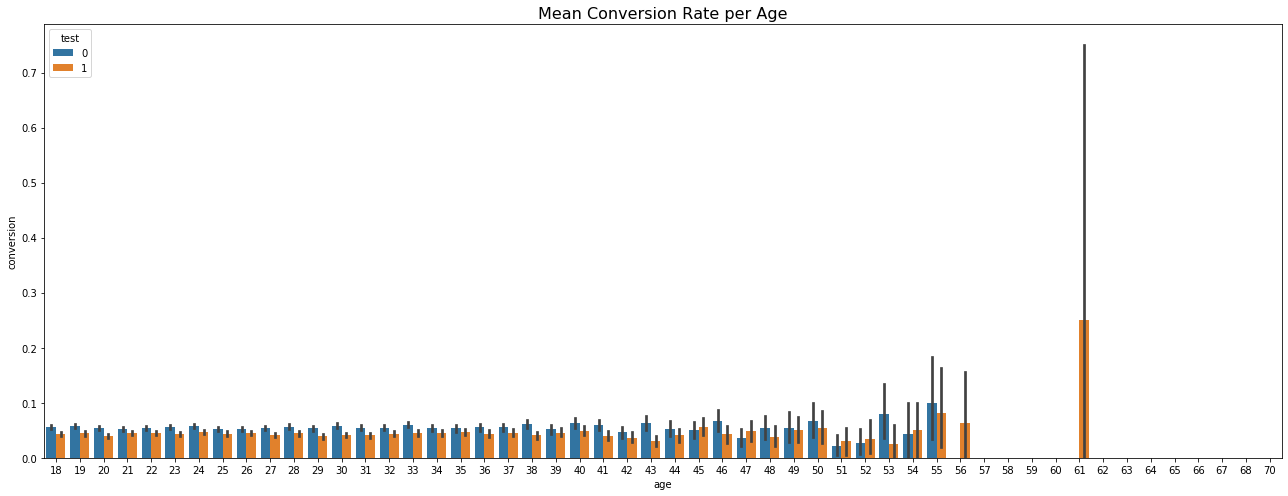

In [159]:
# Visualization of different ages
plt.subplots(figsize=(18, 7))
sns.barplot(x='age', y='conversion', hue='test', data=data.dropna(axis = 0,subset = ['age']).astype({'age': 'int64'}))
plt.title('Mean Conversion Rate per Age', fontsize=16)
plt.tight_layout()
plt.show()

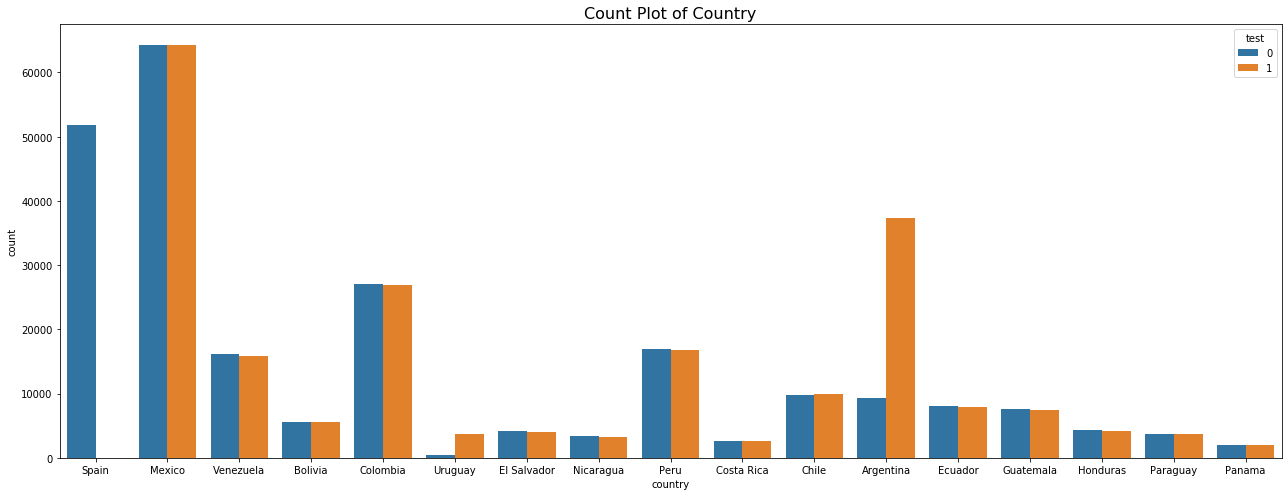

In [164]:
# Visualization of different country
plt.subplots(figsize=(18, 7))
sns.countplot(x='country',hue='test', data=data)
plt.title('Count Plot of Country', fontsize=16)
plt.tight_layout()
plt.show()

In an ideal world, the distribution of people in test and control 
for each segment should be the same. There are many ways to check this. 
Looks very interesting. The randomization is perfect for the countries on one side of the split 
(country=Bolivia, Chile, Colombia, Costa Rica, Ecuador, EL Salvador, Guatemala,               
Honduras, Mexico, Nicaragua, Panama, Paraguay, Peru, Venezuela). 
However, Argentina and Uruguay together have 80% test and 20% control!

In [161]:
data.groupby(['country','test']).size()

country      test
Argentina    0        9356
             1       37377
Bolivia      0        5550
             1        5574
Chile        0        9853
             1        9884
Colombia     0       27088
             1       26972
Costa Rica   0        2660
             1        2649
Ecuador      0        8036
             1        7859
El Salvador  0        4108
             1        4067
Guatemala    0        7622
             1        7503
Honduras     0        4361
             1        4207
Mexico       0       64209
             1       64275
Nicaragua    0        3419
             1        3304
Panama       0        1966
             1        1985
Paraguay     0        3650
             1        3697
Peru         0       16869
             1       16797
Spain        0       51782
Uruguay      0         415
             1        3719
Venezuela    0       16149
             1       15905
dtype: int64

In [11]:
#A simple t-test here should work. We have collected ~0.5MM data and test/control split is ~50/50.
# A/B test
test_data = data[data['country'] != 'Spain']#nothing changed in Spain, so no point in keeping those users
test_val = test_data[test_data['test'] == 1]['conversion'].values
cont_val = test_data[test_data['test'] == 0]['conversion'].values

In [31]:
#get mean conversion of test and control group
print(test_val.mean().round(4), cont_val.mean().round(4))

0.0434 0.0483


In [33]:
#not in the test are converting at 4.8% while users in the test just at 4.3%. 
#That’s a 10% drop,which would be dramatic if it were true.

In [32]:
print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)


Answer Question1: By compared the mean of each group and the p value(Let's assume the siginificant level is 0.05),
we are pretty sure that the control group performed better than expirement group. 
Therefore, we should not reject the null hypthesis.                                              

Answer Question2: the reson why happening is 
1. We may collect more data, I mean run the expirement at least a full week
2. some bais has been introduced in the experiment for example Argentina and Uruguay together have 80% test and 20% control! But overall, the test/control is almost perfectly 50%/50%


In [49]:
print(test_data[test_data['test'] == 1].groupby('date')['conversion'].mean())

date
2015-11-30    0.043886
2015-12-01    0.041387
2015-12-02    0.044234
2015-12-03    0.043884
2015-12-04    0.043491
Name: conversion, dtype: float64


In [50]:
print(test_data[test_data['test'] == 0].groupby('date')['conversion'].mean())

date
2015-11-30    0.051378
2015-12-01    0.046287
2015-12-02    0.048550
2015-12-03    0.049284
2015-12-04    0.047043
Name: conversion, dtype: float64


In [51]:
test_vs_control = (test_data[test_data['test'] == 1].groupby('date')['conversion'].mean())/(test_data[test_data['test'] == 0].groupby('date')['conversion'].mean())

In [52]:
test_vs_control

date
2015-11-30    0.854179
2015-12-01    0.894141
2015-12-02    0.911090
2015-12-03    0.890439
2015-12-04    0.924486
Name: conversion, dtype: float64

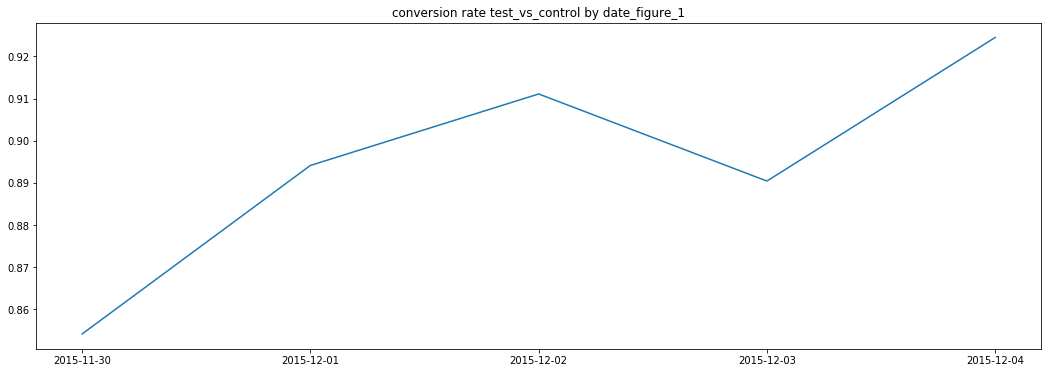

In [67]:
# Visualization, see conversion by contry
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=test_vs_control)
ax.set_title('conversion rate test_vs_control by date_figure_1')
plt.show()

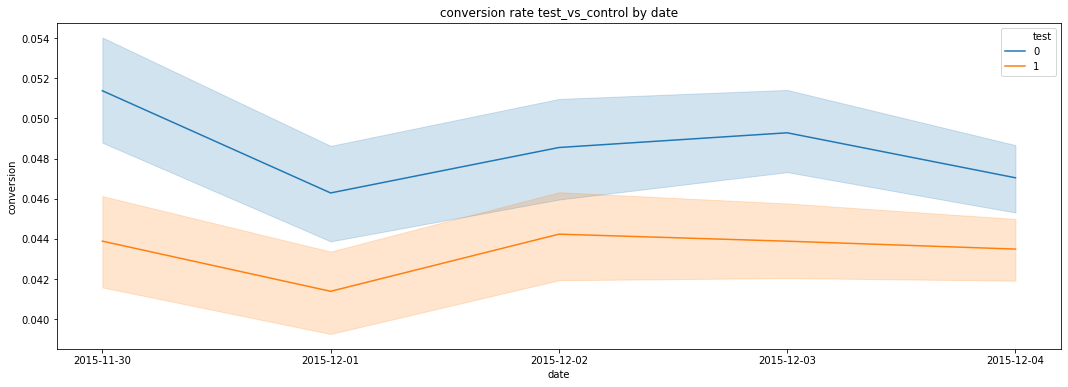

In [66]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(x='date',y='conversion', hue='test',data=test_data,ax=ax)
ax.set_title('conversion rate test_vs_control by date_figure_2')
plt.show()

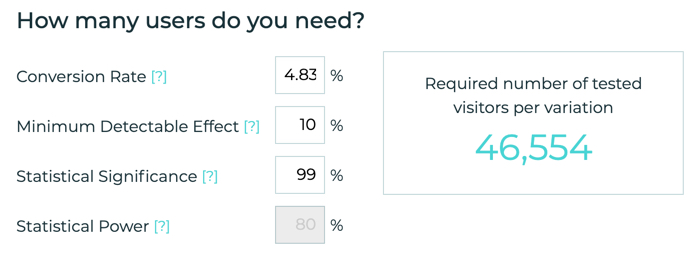

In [68]:
#From the both figure1 and figure2, we notice a couple of things: 
#1. test has constantly been worse than control group(test=0).And there is relatively little variance across days. 
#2. The experiment just ran for 5 days, I will suggest run the experiment at least once.

Optional method using tree.
One way is to build a decision tree where the variables are the user dimensions 
and the outcome variable is whether the user is in test or control. 

If the tree splits, it means that for given values of that variable you are more likely to end up in test or control. But this should be impossible! Therefore, if the randomization worked, 
the tree should not split at all (or at least not be able to separate the two classes well).

In [88]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators import H2OGradientBoostingEstimator
h2o.init()
h2o.remove_all()

h2o_df = H2OFrame(data)
h2o_df['test'] = h2o_df['test'].asfactor()
h2o_df['ads_channel'] = h2o_df['ads_channel'].asfactor()
h2o_df.summary()
feature = ['user_id', 'date', 'source', 'device', 'browser_language',
       'ads_channel', 'browser', 'sex', 'age',
       'country']
target = 'test'
# Build random forest model
model = H2OGradientBoostingEstimator(ntrees = 2, max_depth = 2)
model.train(x=feature, y=target, training_frame=h2o_df)
print(model)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 16 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,"7 days, 18 hours and 3 minutes"
H2O_cluster_name:,H2O_from_python_Jackie_xym3ib
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.308 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
type,int,time,enum,enum,enum,enum,enum,int,enum,enum,int,enum
mins,1.0,1448841600000.0,,,,,,0.0,,,18.0,
mean,499937.5147279741,1449046567976.33,,,,,,0.04957855471067963,,,27.130740371897268,
maxs,1000000.0,1449187200000.0,,,,,,1.0,,,70.0,
sigma,288665.19343595306,125496183.25629999,,,,,,0.21707285774334872,,,6.776678429910461,
zeros,0,0,,,,,,430846,,,0,
missing,0,0,0,0,0,0,0,0,0,0,454,0
0,315281.0,2015-12-03 00:00:00,Direct,Web,ES,nan,IE,1.0,0,M,32.0,Spain
1,497851.0,2015-12-04 00:00:00,Ads,Web,ES,Google,IE,0.0,1,M,21.0,Mexico
2,848402.0,2015-12-04 00:00:00,Ads,Web,ES,Facebook,Chrome,0.0,0,M,34.0,Spain


gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1590093950342_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,2.0,2.0,190.0,2.0,2.0,2.0,3.0,3.0,3.0




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.23624158970390588
RMSE: 0.48604690072451434
LogLoss: 0.6652429686182143
Mean Per-Class Error: 0.3909108528764884
AUC: 0.6628848432730149
AUCPR: 0.6325832302880441
Gini: 0.3257696865460298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4806787665224881: 


,,0,1,Error,Rate
0,0,51782.0,185556.0,0.7818,(185556.0/237338.0)
1,1,0.0,215983.0,0.0,(0.0/215983.0)
2,Total,51782.0,401539.0,0.4093,(185556.0/453321.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.480679,0.699515,1.0
1,max f2,0.480679,0.853370,1.0
2,max f0point5,0.480679,0.592663,1.0
3,max accuracy,0.539404,0.592655,0.0
4,max precision,0.539404,0.807911,0.0
5,max recall,0.480679,1.000000,1.0
6,max specificity,0.539404,0.958831,0.0
7,max absolute_mcc,0.480679,0.342572,1.0
8,max min_per_class_accuracy,0.480679,0.218178,1.0
9,max mean_per_class_accuracy,0.480679,0.609089,1.0



Gains/Lift Table: Avg response rate: 47.64 %, avg score: 47.66 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.112210,0.539404,1.695703,1.695703,0.807911,0.539404,0.807911,0.539404,0.190274,0.190274,69.570264,69.570264
1,,2,0.885772,0.480679,1.046749,1.128959,0.498720,0.480679,0.537888,0.488118,0.809726,1.000000,4.674937,12.895883
2,,3,1.000000,0.386875,0.000000,1.000000,0.000000,0.386875,0.476446,0.476553,0.000000,1.000000,-100.000000,0.000000




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-05-21 15:48:10,0.011 sec,0.0,0.499445,0.692037,0.500000,0.476446,1.000000,0.523554
1,,2020-05-21 15:48:11,0.143 sec,1.0,0.492072,0.677319,0.662885,0.632583,1.695703,0.409326
2,,2020-05-21 15:48:11,0.227 sec,2.0,0.486047,0.665243,0.662885,0.632583,1.695703,0.409326



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,country,31720.345703,1.0,1.0
1,user_id,0.000000,0.0,0.0
2,date,0.000000,0.0,0.0
3,source,0.000000,0.0,0.0
4,device,0.000000,0.0,0.0
5,browser_language,0.000000,0.0,0.0
6,ads_channel,0.000000,0.0,0.0
7,browser,0.000000,0.0,0.0
8,sex,0.000000,0.0,0.0
9,age,0.000000,0.0,0.0


In [165]:
countries = [name for name in data['country'].unique() if name is not np.nan]

for country in countries:
    test_val = data[(data['country'] == country) & (data['test'] == 1)]['conversion'].values
    cont_val = data[(data['country'] == country) & (data['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))

Spain                       nan         0.07972        nan
Mexico                  0.05119         0.04949   0.165544
Venezuela               0.04898         0.05034   0.573702
Bolivia                 0.04790         0.04937   0.718885
Colombia                0.05057         0.05209   0.423719
Uruguay                 0.01291         0.01205   0.879764
El Salvador             0.04795         0.05355   0.248127
Nicaragua               0.05418         0.05265   0.780400
Peru                    0.05060         0.04991   0.771953
Costa Rica              0.05474         0.05226   0.687876
Chile                   0.05130         0.04811   0.302848
Argentina               0.01373         0.01507   0.335147
Ecuador                 0.04899         0.04915   0.961512
Guatemala               0.04865         0.05064   0.572107
Honduras                0.04754         0.05091   0.471463
Paraguay                0.04923         0.04849   0.883697
Panama                  0.04937         0.04680   0.7053

After we control for country, the test clearly appears non significant. 
Not a great success given that the goal was to improve conversion rate, 
but at least we know that a localized translation didn’t make things worse!